In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2,f_regression,mutual_info_regression,SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_percentage_error,r2_score,mean_absolute_error
from sklearn.linear_model import LassoCV,Lasso, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.formula.api as smf
from sklearn.neighbors import NearestNeighbors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
from kneed import KneeLocator
from sklearn import metrics
from sklearn.decomposition import PCA
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go

In [ ]:
#Read the dataset
df = pd.read_excel(r'KPI Set.xlsx')
df

In [81]:
df_s = df

In [ ]:
#Select only the numerical columns of the data set
df =df.select_dtypes([np.number])

In [ ]:
#Drop the two columns with location details
df=df.drop(labels=['Latitudes', 'Longitudes'], axis=1)
df

In [86]:
#Replace the 'Nan' values in the dataset with 0
df=df.replace(np.nan, 0)

## Feature Selection using LASSO Regression

In [87]:
X = df.drop("SE", axis = 1)
X.shape

(1720, 10)

In [88]:
Y = df["SE"]
Y.shape

(1720,)

In [89]:
#Split the data set into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=41)

In [90]:
#Define a pipeline
pipeline = Pipeline([
                     ('scaler',StandardScaler()),#Pre-processing the data
                     ('model',Lasso())           #Assigning the model
])

In [91]:
#Define a grid search
search = GridSearchCV(pipeline,
                      #{'model__alpha':alphas},
                      {'model__alpha':10**np.linspace(10,-2,100)*0.5},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [92]:
# perform the search
search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........model__alpha=5000000000.0;, score=-0.226 total time=   0.9s
[CV 2/5] END ........model__alpha=5000000000.0;, score=-0.234 total time=   0.0s
[CV 3/5] END ........model__alpha=5000000000.0;, score=-0.211 total time=   0.0s
[CV 4/5] END ........model__alpha=5000000000.0;, score=-0.237 total time=   0.0s
[CV 5/5] END ........model__alpha=5000000000.0;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=3782316637.773145;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=3782316637.773145;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=3782316637.773145;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=3782316637.773145;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha=3782316637.773145;, score=-0.282 total time=   0.0s
[CV 1/5] END ....model__alpha=2861183829.67511;, score=-0.226 total time=   0.0s
[CV 2/5] END ....model__alpha=2861183829.67511

[CV 1/5] END ....model__alpha=6164233.69721033;, score=-0.226 total time=   0.0s
[CV 2/5] END ....model__alpha=6164233.69721033;, score=-0.234 total time=   0.0s
[CV 3/5] END ....model__alpha=6164233.69721033;, score=-0.211 total time=   0.0s
[CV 4/5] END ....model__alpha=6164233.69721033;, score=-0.237 total time=   0.0s
[CV 5/5] END ....model__alpha=6164233.69721033;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=4663016.734416099;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=4663016.734416099;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=4663016.734416099;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=4663016.734416099;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha=4663016.734416099;, score=-0.282 total time=   0.0s
[CV 1/5] END ..model__alpha=3527401.1553593227;, score=-0.226 total time=   0.0s
[CV 2/5] END ..model__alpha=3527401.1553593227;, score=-0.234 total time=   0.0s
[CV 3/5] END ..model__alpha=

[CV 2/5] END ...model__alpha=4348.745013088917;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=4348.745013088917;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=4348.745013088917;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha=4348.745013088917;, score=-0.282 total time=   0.0s
[CV 1/5] END ..model__alpha=3289.6661232878414;, score=-0.226 total time=   0.0s
[CV 2/5] END ..model__alpha=3289.6661232878414;, score=-0.234 total time=   0.0s
[CV 3/5] END ..model__alpha=3289.6661232878414;, score=-0.211 total time=   0.0s
[CV 4/5] END ..model__alpha=3289.6661232878414;, score=-0.237 total time=   0.0s
[CV 5/5] END ..model__alpha=3289.6661232878414;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=2488.511782166057;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=2488.511782166057;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=2488.511782166057;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha

[CV 3/5] END ..model__alpha=3.0679536367065814;, score=-0.211 total time=   0.0s
[CV 4/5] END ..model__alpha=3.0679536367065814;, score=-0.237 total time=   0.0s
[CV 5/5] END ..model__alpha=3.0679536367065814;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=2.320794416806386;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=2.320794416806386;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=2.320794416806386;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=2.320794416806386;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha=2.320794416806386;, score=-0.282 total time=   0.0s
[CV 1/5] END ..model__alpha=1.7555958671075638;, score=-0.226 total time=   0.0s
[CV 2/5] END ..model__alpha=1.7555958671075638;, score=-0.234 total time=   0.0s
[CV 3/5] END ..model__alpha=1.7555958671075638;, score=-0.211 total time=   0.0s
[CV 4/5] END ..model__alpha=1.7555958671075638;, score=-0.237 total time=   0.0s
[CV 5/5] END ..model__alpha=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03])},
             scoring='neg_mean_squared_error', verbose=3)

In [93]:
#Obtain the best parameter
search.best_params_

{'model__alpha': 0.005}

In [94]:
#Obtain the coefficients from the model
coefficients = search.best_estimator_.named_steps['model'].coef_

In [95]:
model_coef = pd.Series(coefficients, index = list(X_train.columns))

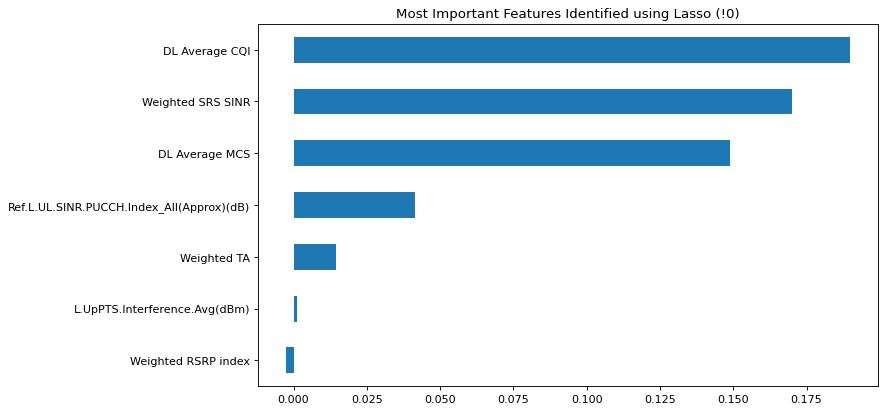

In [96]:
#Visualize the selected features from Lasso Regression
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")
plt.savefig('Lasso5.png')
plt.show()

In [97]:
importance = np.abs(coefficients)
importance

array([0.14877366, 0.01464641, 0.0024889 , 0.04159174, 0.18976979,
       0.00134036, 0.16998055, 0.        , 0.        , 0.        ])

In [ ]:
#Selected features
selected_features = X_train.columns[importance > 0]
selected_features

In [ ]:
#Removed features
removed_features = X_train.columns[importance == 0]
removed_features

In [100]:
X_train= X_train.drop(labels=removed_features, axis=1)
X_test=X_test.drop(labels=removed_features, axis=1)

In [101]:
search.fit(X_train,y_train)
lasso_predict = search.predict(X_test)
Lasso_MAE = mean_absolute_percentage_error(y_test,lasso_predict)
print("MAPE value: ",Lasso_MAE)
r2score=r2_score(y_test,lasso_predict)
print('r2_score of Lasso Regression: {:0.2f}'.format(r2score))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........model__alpha=5000000000.0;, score=-0.226 total time=   0.0s
[CV 2/5] END ........model__alpha=5000000000.0;, score=-0.234 total time=   0.0s
[CV 3/5] END ........model__alpha=5000000000.0;, score=-0.211 total time=   0.0s
[CV 4/5] END ........model__alpha=5000000000.0;, score=-0.237 total time=   0.0s
[CV 5/5] END ........model__alpha=5000000000.0;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=3782316637.773145;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=3782316637.773145;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=3782316637.773145;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=3782316637.773145;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha=3782316637.773145;, score=-0.282 total time=   0.0s
[CV 1/5] END ....model__alpha=2861183829.67511;, score=-0.226 total time=   0.0s
[CV 2/5] END ....model__alpha=2861183829.67511

[CV 3/5] END ..model__alpha=10772173.450159412;, score=-0.211 total time=   0.0s
[CV 4/5] END ..model__alpha=10772173.450159412;, score=-0.237 total time=   0.0s
[CV 5/5] END ..model__alpha=10772173.450159412;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=8148754.173103217;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=8148754.173103217;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=8148754.173103217;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=8148754.173103217;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha=8148754.173103217;, score=-0.282 total time=   0.0s
[CV 1/5] END ....model__alpha=6164233.69721033;, score=-0.226 total time=   0.0s
[CV 2/5] END ....model__alpha=6164233.69721033;, score=-0.234 total time=   0.0s
[CV 3/5] END ....model__alpha=6164233.69721033;, score=-0.211 total time=   0.0s
[CV 4/5] END ....model__alpha=6164233.69721033;, score=-0.237 total time=   0.0s
[CV 5/5] END ....model__alph

[CV 3/5] END ...model__alpha=7599.555414764665;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=7599.555414764665;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha=7599.555414764665;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=5748.784976988678;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=5748.784976988678;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=5748.784976988678;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=5748.784976988678;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha=5748.784976988678;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=4348.745013088917;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=4348.745013088917;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=4348.745013088917;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=4348.745013088917;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha

[CV 3/5] END ..model__alpha=21.643806405415308;, score=-0.211 total time=   0.0s
[CV 4/5] END ..model__alpha=21.643806405415308;, score=-0.237 total time=   0.0s
[CV 5/5] END ..model__alpha=21.643806405415308;, score=-0.282 total time=   0.0s
[CV 1/5] END ..model__alpha=16.372745814388658;, score=-0.226 total time=   0.0s
[CV 2/5] END ..model__alpha=16.372745814388658;, score=-0.234 total time=   0.0s
[CV 3/5] END ..model__alpha=16.372745814388658;, score=-0.211 total time=   0.0s
[CV 4/5] END ..model__alpha=16.372745814388658;, score=-0.237 total time=   0.0s
[CV 5/5] END ..model__alpha=16.372745814388658;, score=-0.282 total time=   0.0s
[CV 1/5] END ...model__alpha=12.38538177995857;, score=-0.226 total time=   0.0s
[CV 2/5] END ...model__alpha=12.38538177995857;, score=-0.234 total time=   0.0s
[CV 3/5] END ...model__alpha=12.38538177995857;, score=-0.211 total time=   0.0s
[CV 4/5] END ...model__alpha=12.38538177995857;, score=-0.237 total time=   0.0s
[CV 5/5] END ...model__alpha

[CV 3/5] END .model__alpha=0.06164233697210317;, score=-0.068 total time=   0.0s
[CV 4/5] END .model__alpha=0.06164233697210317;, score=-0.073 total time=   0.0s
[CV 5/5] END .model__alpha=0.06164233697210317;, score=-0.087 total time=   0.0s
[CV 1/5] END ..model__alpha=0.0466301673441609;, score=-0.078 total time=   0.0s
[CV 2/5] END ..model__alpha=0.0466301673441609;, score=-0.066 total time=   0.0s
[CV 3/5] END ..model__alpha=0.0466301673441609;, score=-0.066 total time=   0.0s
[CV 4/5] END ..model__alpha=0.0466301673441609;, score=-0.071 total time=   0.0s
[CV 5/5] END ..model__alpha=0.0466301673441609;, score=-0.083 total time=   0.0s
[CV 1/5] END .model__alpha=0.03527401155359316;, score=-0.076 total time=   0.0s
[CV 2/5] END .model__alpha=0.03527401155359316;, score=-0.063 total time=   0.0s
[CV 3/5] END .model__alpha=0.03527401155359316;, score=-0.064 total time=   0.0s
[CV 4/5] END .model__alpha=0.03527401155359316;, score=-0.069 total time=   0.0s
[CV 5/5] END .model__alpha=0

In [ ]:
df_lasso = df[selected_features]
df_lasso

In [ ]:
df_1 = pd.concat([df_lasso,df['SE']],axis=1,join='inner')
df_1

In [104]:
#Obtain the correlation coefficient matrix of the selected features
correlated_features2 = set()
correlation_matrix2 = df_1.corr()

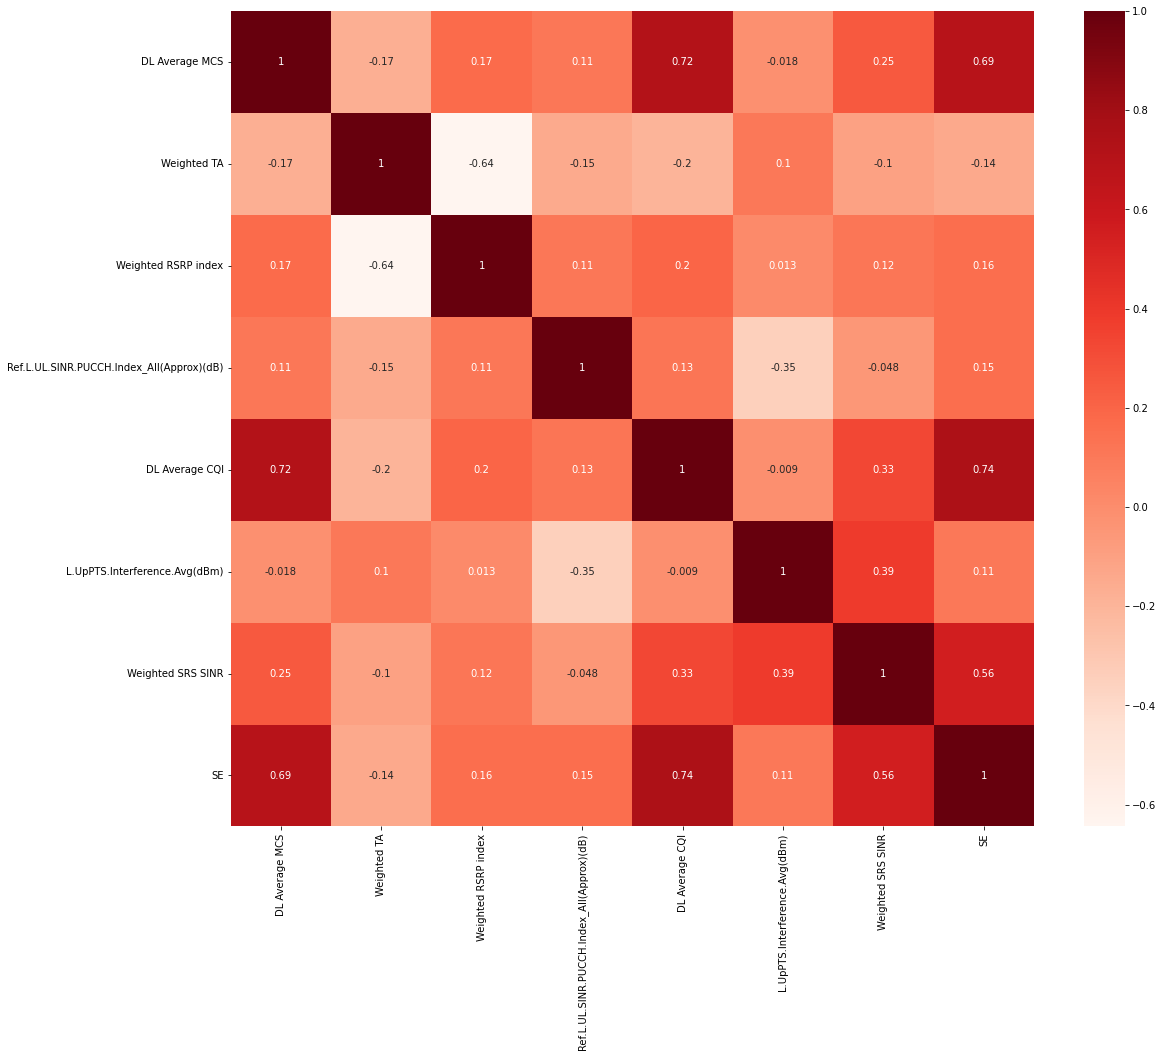

In [105]:
plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix2,annot=True,cmap=plt.cm.Reds)
plt.savefig('lasso.png')
plt.show()

In [106]:
#Obtain the correlation between each feature with the 'SE'
cor_target = abs(correlation_matrix2["SE"])
cor_target

DL Average MCS                               0.693782
Weighted TA                                  0.142226
Weighted RSRP index                          0.157964
Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)    0.154918
DL Average CQI                               0.743826
L.UpPTS.Interference.Avg(dBm)                0.106538
Weighted SRS SINR                            0.556784
SE                                           1.000000
Name: SE, dtype: float64

In [107]:
cor_target.sort_values(ascending=True)

L.UpPTS.Interference.Avg(dBm)                0.106538
Weighted TA                                  0.142226
Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)    0.154918
Weighted RSRP index                          0.157964
Weighted SRS SINR                            0.556784
DL Average MCS                               0.693782
DL Average CQI                               0.743826
SE                                           1.000000
Name: SE, dtype: float64

In [108]:
cor_target.index

Index(['DL Average MCS', 'Weighted TA', 'Weighted RSRP index',
       'Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)', 'DL Average CQI',
       'L.UpPTS.Interference.Avg(dBm)', 'Weighted SRS SINR', 'SE'],
      dtype='object')

In [109]:
#Remove the features having correlation with 'SE' below 0.1
for i in cor_target.index:
    if cor_target[i]<0.1:
        cor_target = cor_target.drop(i)
        

In [110]:
#Sort the features according to the ascending order of the correlation values
cor_target.sort_values(ascending=True)

L.UpPTS.Interference.Avg(dBm)                0.106538
Weighted TA                                  0.142226
Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)    0.154918
Weighted RSRP index                          0.157964
Weighted SRS SINR                            0.556784
DL Average MCS                               0.693782
DL Average CQI                               0.743826
SE                                           1.000000
Name: SE, dtype: float64

In [111]:
indexes = cor_target.sort_values(ascending=True).index
indexes

Index(['L.UpPTS.Interference.Avg(dBm)', 'Weighted TA',
       'Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)', 'Weighted RSRP index',
       'Weighted SRS SINR', 'DL Average MCS', 'DL Average CQI', 'SE'],
      dtype='object')

In [ ]:
df_sort= df_1[indexes].drop('SE',axis =1)
df_sort

In [113]:
df_sort.columns

Index(['L.UpPTS.Interference.Avg(dBm)', 'Weighted TA',
       'Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)', 'Weighted RSRP index',
       'Weighted SRS SINR', 'DL Average MCS', 'DL Average CQI'],
      dtype='object')

In [114]:
correlated_features3 = set()
correlation_matrix3 = df_sort.corr()

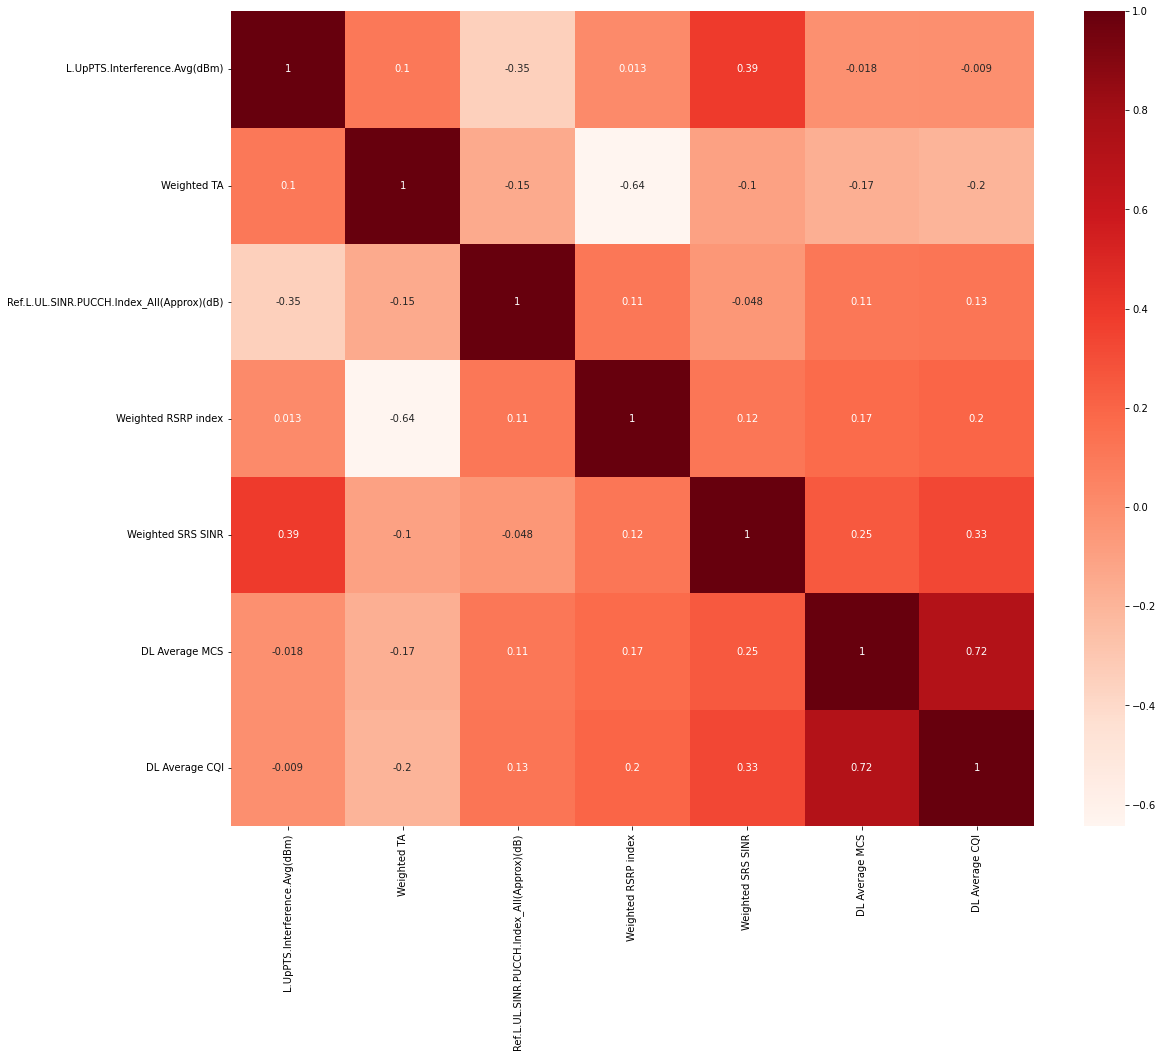

In [115]:
plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix3,annot=True,cmap=plt.cm.Reds)
plt.savefig('lasso_se.png')
plt.show()

## Removing the multicollinearity of the dataset using Variance Inflation Factor

In [116]:
#Removing the multicollinearity of the dataset using Variance Inflation Factor(To calculate the VIF, the dataset which sorted according to theascending order of the correlation with 'SE' is used)
def cal_vif(X_train):
    #Assign the threshold value
    thresh =10
    output = pd.DataFrame
    #Obtain the feature set
    k=X_train.shape[1]
    #Calculate the VIF value for each feature in the initial iteration
    vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    for i in range(1,k):
        print('Iteration no:',i)
        print(vif)
        a = np.argmax(vif)
        arr = np.array(vif)
        #idx = (-arr).argsort()[:5]
        idx = [i for i,v in enumerate(vif) if v > 10]
       
        print('Max vif is for variable no :',a)
        
        if(vif[a]<=thresh):
            break
        #Identify the 1st iteration
        if i==1:
            print('Removing Feature Index:',idx[0])
            print('Removing Feature :',X_train.columns[idx[0]])
            output = X_train.drop(X_train.columns[idx[0]],axis=1)# Remove the feature having the highest VIF above 10 and having the least correlation with 'SE' from the initial data set(X_train) in the 1st iteration
            #Calculate the VIF values for each feature in the remaining data set
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
            
        elif (i>1):
            print('Removing Feature Index:',idx[0])
            print('Removing Feature :',output.columns[idx[0]])
            output = output.drop(output.columns[idx[0]],axis=1)# Remove the feature having the highest VIF above 10 and having the least correlation with 'SE' from the remaining data set(X_train) in the 1st iteration
            #Calculate the VIF values for each feature in the remaining data set
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
            
    return(output)
            
    
selected_features = cal_vif(df_sort)
selected_features

Iteration no: 1
[135.28282580627325, 8.999335281265468, 1.123385493091504, 75.25825494722258, 1.8320561517837217, 48.3153655543739, 156.18114831835413]
Max vif is for variable no : 6
Removing Feature Index: 0
Removing Feature : L.UpPTS.Interference.Avg(dBm)
Iteration no: 2
[6.602035967637678, 1.0895874311989928, 45.876134944675606, 1.561040178338807, 47.88029298834881, 123.96183841782752]
Max vif is for variable no : 5
Removing Feature Index: 2
Removing Feature : Weighted RSRP index
Iteration no: 3
[6.192170201731033, 1.0885004670613947, 1.5320098830349387, 47.16571290860712, 56.46975460065671]
Max vif is for variable no : 4
Removing Feature Index: 3
Removing Feature : DL Average MCS
Iteration no: 4
[6.102631964386867, 1.087273567193326, 1.525511428954681, 7.312068387333876]
Max vif is for variable no : 3


,Weighted TA,Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB),Weighted SRS SINR,DL Average CQI
0,2.078463,3.8565,0.000000,8.8935
1,0.996162,4.0721,0.000000,9.4796
2,1.818880,0.4986,0.000000,8.8074
3,2.708791,0.9007,2.062834,9.9626
4,1.983465,1.8279,1.852774,10.9381
...,...,...,...,...
1715,1.188193,0.6115,1.371745,9.2734
1716,1.229188,0.2978,0.000000,9.2055
1717,2.295568,1.1449,0.000000,9.6427
1718,0.937449,-3.1317,0.000000,7.7054


In [ ]:
df_vif = selected_features
df_vif

In [ ]:
data = pd.concat([df_vif,df['SE']],axis=1,join='inner')
data

In [119]:
#Calculate the correlation matrix of the selected featues after removing multicollinearity
correlated_features = set()
correlation_matrix = data.corr()
correlation_matrix

,Weighted TA,Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB),Weighted SRS SINR,DL Average CQI,SE
Weighted TA,1.000000,-0.146170,-0.102829,-0.197602,-0.142226
Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB),-0.146170,1.000000,-0.047736,0.126515,0.154918
Weighted SRS SINR,-0.102829,-0.047736,1.000000,0.329090,0.556784
DL Average CQI,-0.197602,0.126515,0.329090,1.000000,0.743826
SE,-0.142226,0.154918,0.556784,0.743826,1.000000


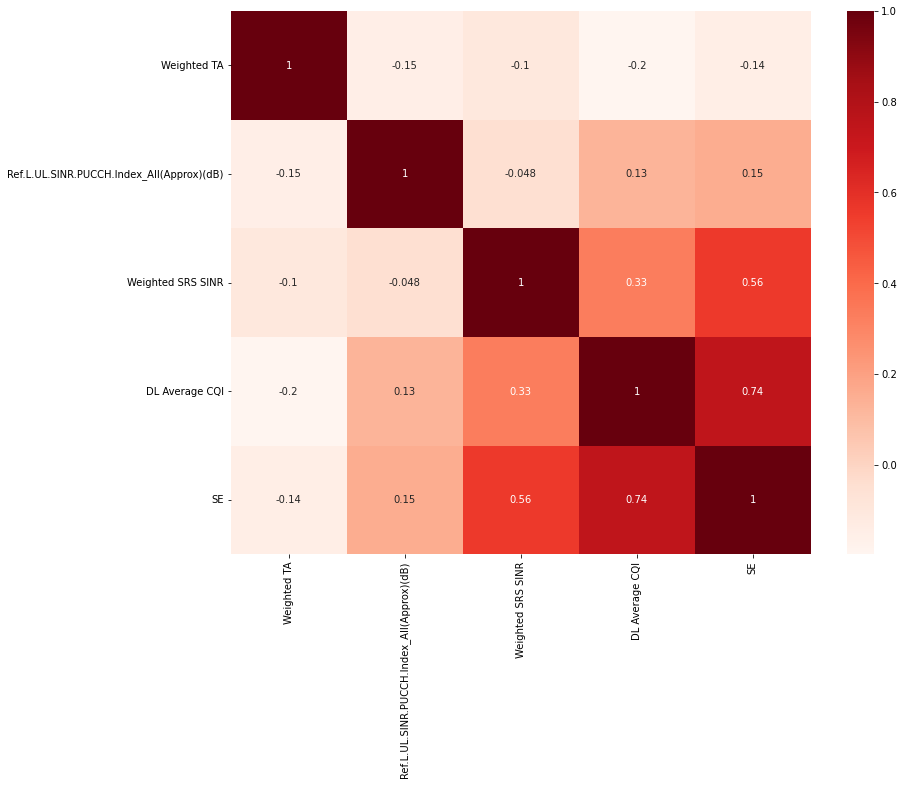

In [120]:
plt.figure(figsize=(13,10))
sns.heatmap(correlation_matrix,annot=True,cmap=plt.cm.Reds)
plt.savefig('lasso_se_VIF10.png')
plt.show()

In [ ]:
#Concat the 'TXRX' categorical variable to the data set
data2 = pd.concat([data,df_s['TXRX']],axis=1,join='inner')
data2

In [123]:
#Group the data set according to the 'TXRX' column of the data set
grouped_df = data2.groupby(data2['TXRX'])

In [124]:
#Put the values in the categorical variable in to an array
array=[]
array=data2['TXRX'].unique()

In [125]:
array

array(['2T2R', '4T4R', '64T64R', '8T8R'], dtype=object)

## Obtain multiple clusters using DBSCAN Clustering

     Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
0       0.918949                                   0.536060   
1      -0.650539                                   0.691128   
2      -0.618477                                   0.435079   
3       0.478601                                  -5.781017   
4      -0.278169                                   0.267208   
..           ...                                        ...   
312     0.648834                                   1.064557   
313    -0.039950                                   0.619779   
314    -0.722285                                   0.190825   
315    -0.074759                                  -0.020056   
316     0.517759                                   0.284614   

     Weighted SRS SINR  DL Average CQI        SE  
0                  0.0       -0.011246  0.950576  
1                  0.0        0.541094 -0.123493  
2                  0.0       -0.156187 -0.837904  
3                  0.0       -2.470340 

      Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
0        2.078463                                     3.8565   
1        0.996162                                     4.0721   
47       1.018272                                     3.7161   
49       1.774804                                    -4.9265   
50       1.252944                                     3.4827   
...           ...                                        ...   
1693     1.892194                                     4.5913   
1701     1.417217                                     3.9729   
1702     0.946687                                     3.3765   
1703     1.393213                                     3.0833   
1707     1.801807                                     3.5069   

      Weighted SRS SINR  DL Average CQI      SE  Cluster  Latitudes  \
0                   0.0          8.8935  1.5523        0   7.037500   
1                   0.0          9.4796  1.1145        0   7.265833   
47                

<Figure size 360x360 with 0 Axes>

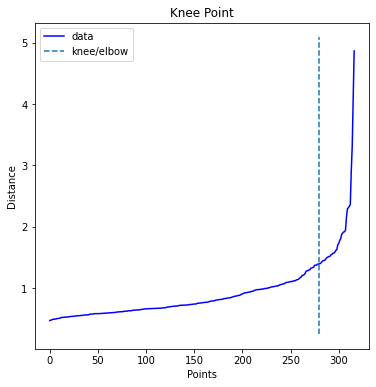

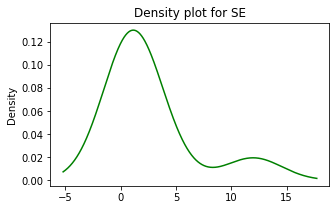

Weighted TA


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



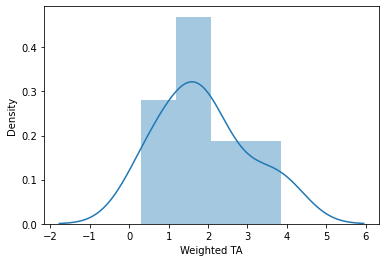

Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



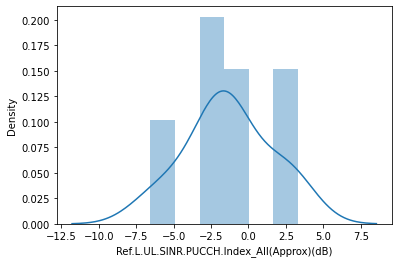

c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Weighted SRS SINR


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



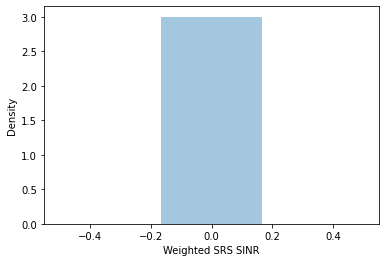

DL Average CQI


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



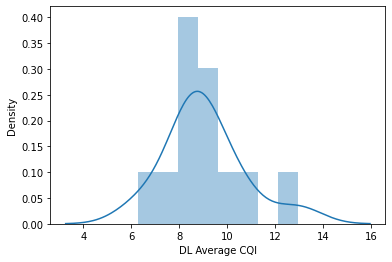

SE


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



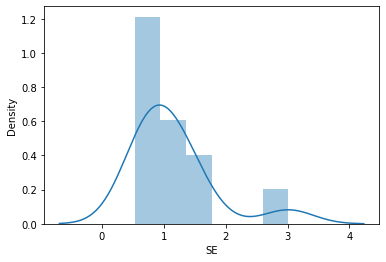

       Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
count   305.000000                                 305.000000   
mean      1.427552                                   3.286394   
std       0.663907                                   0.950708   
min       0.091494                                  -0.675300   
25%       0.875680                                   2.935000   
50%       1.475135                                   3.488700   
75%       1.924081                                   3.891500   
max       3.002789                                   5.488300   

       Weighted SRS SINR  DL Average CQI          SE  
count              305.0      305.000000  305.000000  
mean                 0.0        8.899860    1.165519  
std                  0.0        1.036457    0.396389  
min                  0.0        6.100700    0.435000  
25%                  0.0        8.226800    0.890500  
50%                  0.0        8.825700    1.114500  
75%                  0.0     

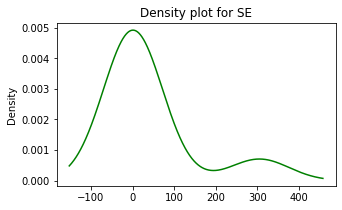

Weighted TA


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



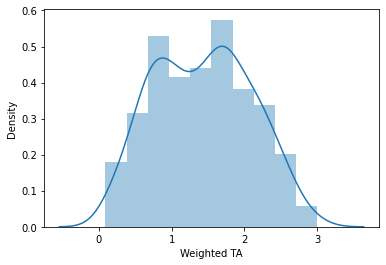

Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



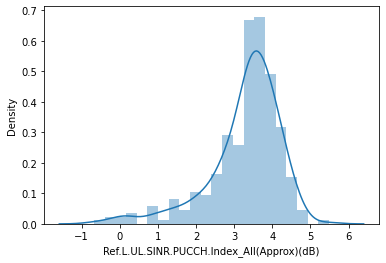

Weighted SRS SINR


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



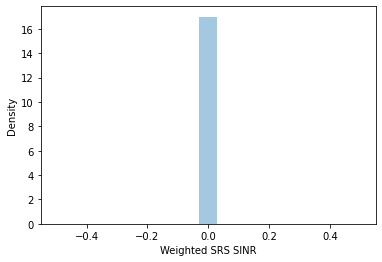

DL Average CQI


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



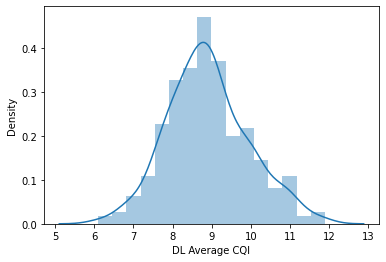

SE


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



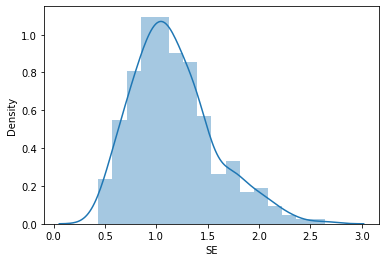

     Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
0      -0.079191                                   0.517400   
1       0.379408                                   0.709201   
2       0.423271                                   0.552651   
3       0.791904                                  -0.474804   
4      -1.018372                                   1.106127   
..           ...                                        ...   
790    -0.778495                                  -0.441329   
791    -0.851021                                   0.405927   
792     0.544731                                   0.876188   
793    -1.232869                                  -1.497929   
794    -0.179482                                  -0.073659   

     Weighted SRS SINR  DL Average CQI        SE  
0            -0.035489       -0.249173  0.251805  
1            -0.035489        0.672133  1.217765  
2            -0.035489        1.401561  1.999757  
3            -0.035489       -0.738210 

      Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
2        1.818880                                     0.4986   
5        2.169258                                     0.8441   
6        2.202770                                     0.5621   
8        2.484413                                    -1.2887   
9        1.101329                                     1.5591   
...           ...                                        ...   
1714     1.284599                                    -1.2284   
1716     1.229188                                     0.2978   
1717     2.295568                                     1.1449   
1718     0.937449                                    -3.1317   
1719     1.742256                                    -0.5661   

      Weighted SRS SINR  DL Average CQI      SE  Cluster  Latitudes  \
2                   0.0          8.8074  1.3328        0   6.989444   
5                   0.0          9.7000  1.7035        0   6.998888   
6                 

<Figure size 360x360 with 0 Axes>

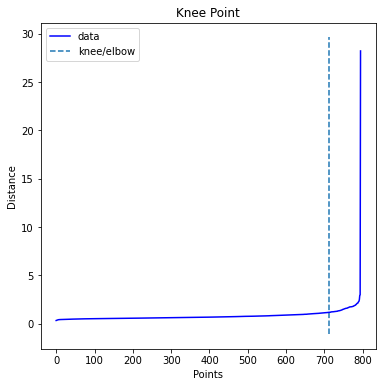

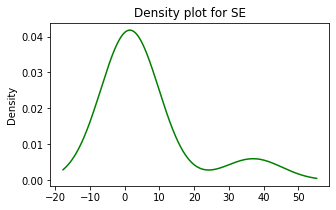

Weighted TA


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



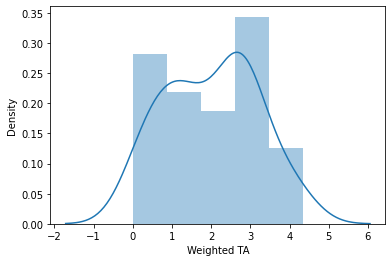

Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



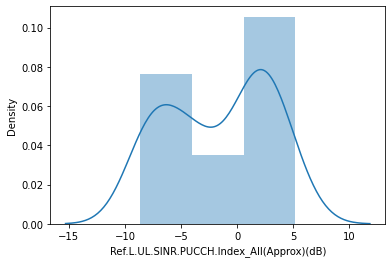

Weighted SRS SINR


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



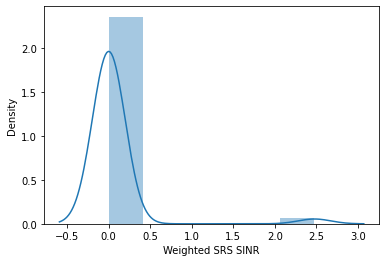

DL Average CQI


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



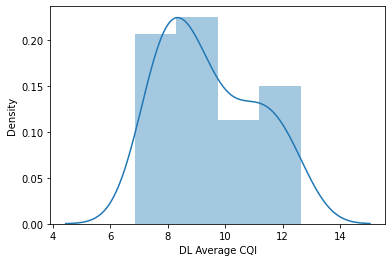

SE


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



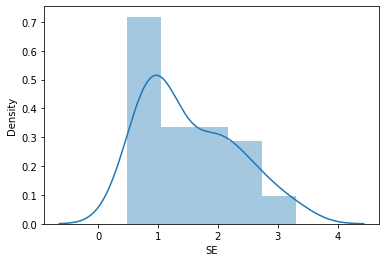

       Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
count   758.000000                                 758.000000   
mean      1.873272                                  -0.374471   
std       0.738858                                   1.529834   
min       0.067070                                  -7.627600   
25%       1.332316                                  -1.151325   
50%       1.896970                                  -0.055350   
75%       2.391130                                   0.676275   
max       4.109501                                   2.622000   

       Weighted SRS SINR  DL Average CQI          SE  
count              758.0      758.000000  758.000000  
mean                 0.0        9.029395    1.222130  
std                  0.0        0.920542    0.348795  
min                  0.0        6.451500    0.464800  
25%                  0.0        8.357825    0.960175  
50%                  0.0        8.954150    1.190950  
75%                  0.0     

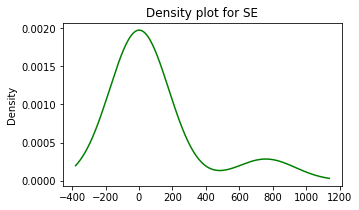

Weighted TA


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



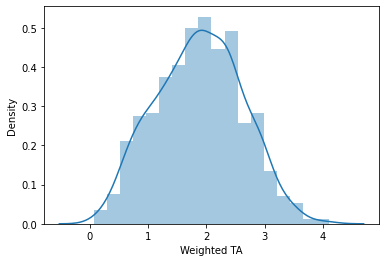

Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



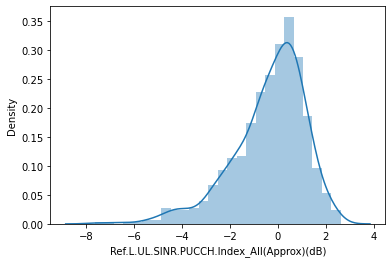

Weighted SRS SINR


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



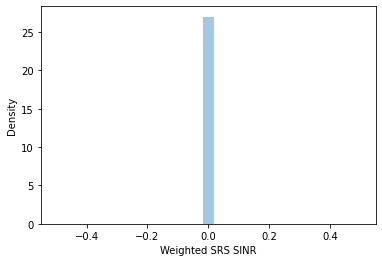

DL Average CQI


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



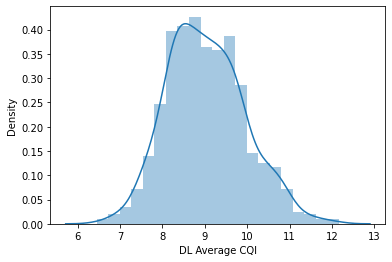

SE


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



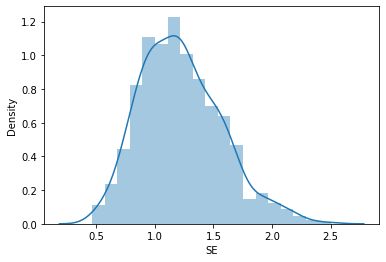

     Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
0       1.594550                                   0.302117   
1       0.416531                                   0.770002   
2       0.159918                                   0.049806   
3       0.506381                                  -0.553519   
4      -0.668258                                  -1.682307   
..           ...                                        ...   
598     1.511222                                   1.269931   
599    -1.485720                                   0.477523   
600    -0.849843                                  -0.015038   
601     1.270289                                   0.882634   
602    -0.875086                                   0.156180   

     Weighted SRS SINR  DL Average CQI        SE  
0             0.141238        0.193847  0.414225  
1            -0.101004        1.148072  0.420193  
2            -0.542791        0.980116  0.425472  
3            -1.223469       -0.134043 

      Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
3        2.708791                                     0.9007   
4        1.983465                                     1.8279   
7        1.825464                                     0.4007   
11       2.038787                                    -0.7949   
12       1.315541                                    -3.0318   
...           ...                                        ...   
1694     2.657485                                     2.8186   
1708     0.812216                                     1.2483   
1709     1.203736                                     0.2722   
1711     2.509138                                     2.0511   
1715     1.188193                                     0.6115   

      Weighted SRS SINR  DL Average CQI      SE  Cluster  Latitudes  \
3              2.062834          9.9626  1.9600        0   7.121666   
4              1.852774         10.9381  1.9626        0   6.952777   
7              1.4

<Figure size 360x360 with 0 Axes>

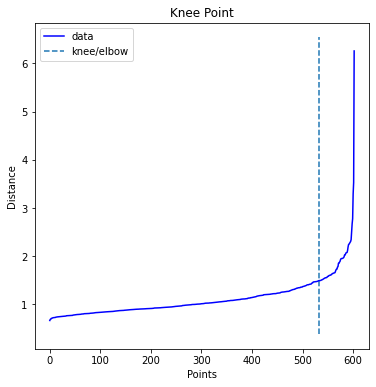

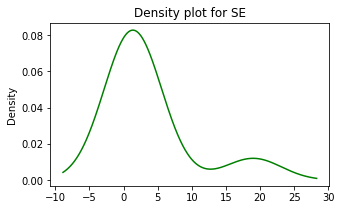

Weighted TA


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



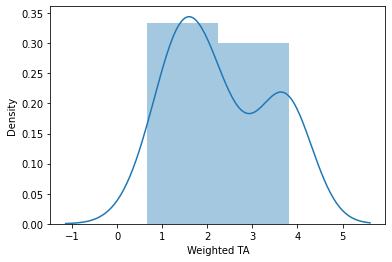

Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



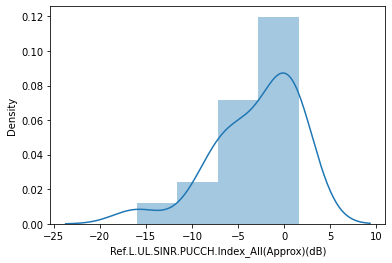

Weighted SRS SINR


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



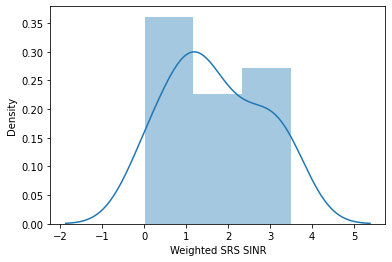

DL Average CQI


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



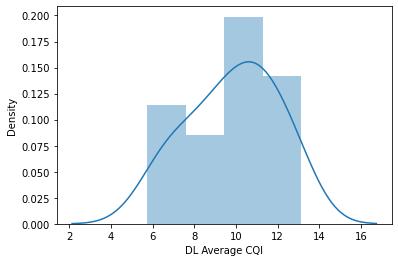

SE


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



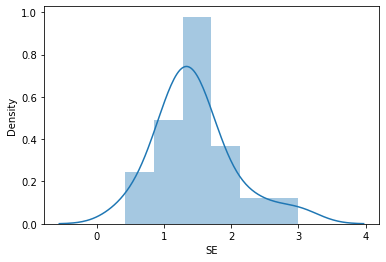

       Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  \
count   584.000000                                 584.000000   
mean      1.708580                                   0.410857   
std       0.587460                                   1.738617   
min       0.191214                                  -6.111900   
25%       1.276399                                  -0.755875   
50%       1.677656                                   0.584550   
75%       2.131330                                   1.735800   
max       3.561328                                   3.928900   

       Weighted SRS SINR  DL Average CQI          SE  
count         584.000000      584.000000  584.000000  
mean            1.948979        9.762504    1.790043  
std             0.857931        0.967686    0.426921  
min             0.042861        7.105100    0.657100  
25%             1.279244        9.107250    1.491750  
50%             1.953742        9.790400    1.813550  
75%             2.570790     

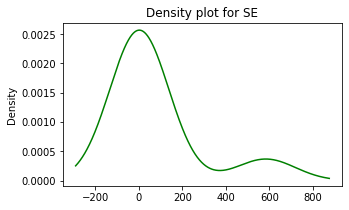

Weighted TA


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



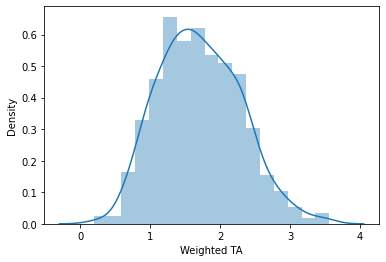

Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



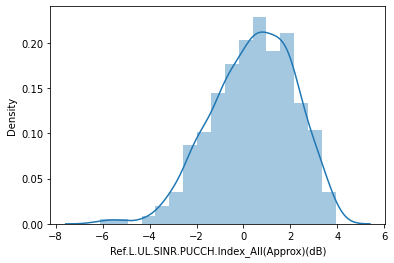

Weighted SRS SINR


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



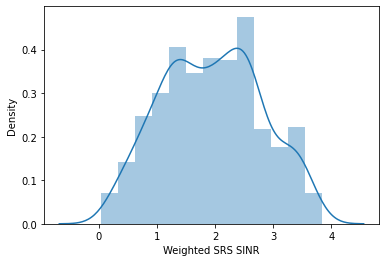

c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



DL Average CQI


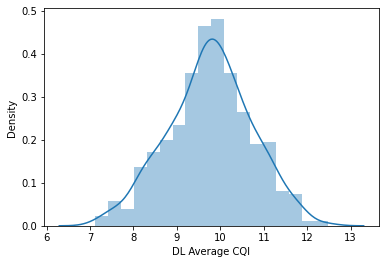

SE


c:\users\max\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



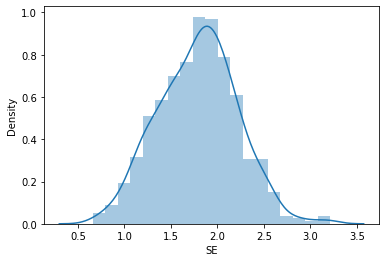

   Weighted TA  Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)  Weighted SRS SINR  \
0    -1.110336                                   0.912548                0.0   
1    -1.311337                                   0.603587                0.0   
2     0.560046                                   0.125616                0.0   
3     0.953956                                   0.283544                0.0   
4     0.907670                                  -1.925295                0.0   

   DL Average CQI        SE  
0        1.625397  1.665387  
1       -0.031951  0.134744  
2       -1.055109 -0.879669  
3        0.472083 -1.171177  
4       -1.010419  0.250715  


In [126]:
for j in range(0,len(array)):
   #Get the data frames as groups according to the 'TXRX'
    g=grouped_df.get_group(array[j])
    g =  g.drop("TXRX", axis = 1)
    df_selected = g
    col=g.columns
    #Define the Standard scaler and scaled the data set
    scaler = StandardScaler()
    g_1 = scaler.fit_transform(g)
    d =pd.DataFrame(g_1,columns=col)
    print(d)
    #Assign the 'min_samples = Dimension of the data set*2' (Since the dataset includes more than 2 features)
    min_samples = d.shape[1]*2
    k = min_samples if min_samples > 2 else 2
    if k <= d.shape[0]: #To implement this, number of neighbours should be less than or equal to the num of samples
        print(k)
        #Applying the nearest neighbours algorithm to plot the distance graph
        neigh = NearestNeighbors(n_neighbors=k)  #k=minpts-1
        nbrs = neigh.fit(d)
        distances, indices = nbrs.kneighbors(d)
        distances = np.sort(distances[:,k-1],axis=0)
        
        i=np.arange(len(distances))
        #Use KneeLocator library to identify the point having maximum curvature
        knee=KneeLocator(i,distances,S=1,curve='convex',direction='increasing',interp_method='polynomial')
        #Optimum epsilon value
        eps = distances[knee.knee]
        
        #Plot the distance plot
        fig = plt.figure(figsize=(5,5))

        knee.plot_knee()
        plt.xlabel("Points")
        plt.ylabel("Distance")
        eps= distances[knee.knee]
        print(eps)
        #Apply the DBSCAN algorithm to the data set
        dbscan = DBSCAN(eps = eps, min_samples=min_samples).fit(d) 
        #Obtain the clusters
        clusters=dbscan.labels_
        #Find the noise points
        no_noise = np.sum(np.array(clusters) == -1, axis=0)
        print('Estimated no. of noise points: %d' % no_noise)
        #Group the data set according to the clusters
        df_selected["Cluster"] = clusters
        cluster_sizes = df_selected.groupby('Cluster').size()
        print(cluster_sizes)
        print(len(cluster_sizes))
        #Calculate the silhoette score to check whether the clustering is performed well.
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(d, clusters))
        
        #PCA with one principal component
        pca_1d = PCA(n_components=1)

        #PCA with two principal components
        pca_2d = PCA(n_components=2)

        #PCA with three principal components
        pca_3d = PCA(n_components=3)
        
        #This DataFrame holds that single principal component mentioned above
        PCs_1d = pd.DataFrame(pca_1d.fit_transform(df_selected.drop(["Cluster"], axis=1)))

        #This DataFrame contains the two principal components that will be used
        #for the 2-D visualization mentioned above
        PCs_2d = pd.DataFrame(pca_2d.fit_transform(df_selected.drop(["Cluster"], axis=1)))

        #And this DataFrame contains three principal components that will aid us
        #in visualizing our clusters in 3-D
        PCs_3d = pd.DataFrame(pca_3d.fit_transform(df_selected.drop(["Cluster"], axis=1)))
        
        PCs_1d.columns = ["PC1_1d"]

        #"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
        #And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
        PCs_2d.columns = ["PC1_2d", "PC2_2d"]

        PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
        data2 = pd.concat([df_selected,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
        data2["dummy"] = 0
        
        cluster0 = data2[data2["Cluster"] == 0]
        cluster1 = data2[data2["Cluster"] == 1]
        outliers = data2[data2["Cluster"] == -1]
        
        init_notebook_mode(connected=True)
        
        trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text = None)

        #trace2 is for 'Cluster 1'
        trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text = None)


        #trace3 is for 'Cluster 2'
        trace3 = go.Scatter(
                    x = outliers["PC1_1d"],
                    y = outliers["dummy"],
                    mode = "markers",
                    name = "outliers",
                    marker = dict(color = 'rgba(0, 255, 0, 0.8)'),
                    text = None)



        data_t = [trace1, trace2, trace3]

        title = "Visualizing Clusters in One Dimension Using PCA"

        layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

        fig = dict(data = data_t, layout = layout)

        iplot(fig)
        
        trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text = None)

        #trace2 is for 'Cluster 1'
        trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text = None)

        #trace3 is for 'Cluster 2'
        trace3 = go.Scatter(
                    x = outliers["PC1_2d"],
                    y = outliers["PC2_2d"],
                    mode = "markers",
                    name = "outliers",
                    marker = dict(color = 'rgba(0, 255, 0, 0.8)'),
                    text = None)

        data_t = [trace1, trace2, trace3]

        title = "Visualizing Clusters in Two Dimensions Using PCA"

        layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

        fig = dict(data = data_t, layout = layout)

        iplot(fig)
        
        trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 0, 0, 0.8)'),
                    text = None)

        #trace2 is for 'Cluster 1'
        trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text = None)

        #trace3 is for 'Cluster 2'
        trace3 = go.Scatter3d(
                    x = outliers["PC1_3d"],
                    y = outliers["PC2_3d"],
                    z = outliers["PC3_3d"],
                    mode = "markers",
                    name = "outliers",
                    marker = dict(color = 'rgba(0, 255, 0, 0.8)'),
                    text = None)

        data_t = [trace1, trace2, trace3]

        title = "Visualizing Clusters in Three Dimensions Using PCA"

        layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

        fig = dict(data = data_t, layout = layout)

        iplot(fig)
        
        data3 = pd.concat([df_selected,df_s[['Latitudes', 'Longitudes']]],axis=1,join='inner')
        #data3 = pd.concat([df_selected,df_s[['Latitude', 'Longitude', 'Azimuth']]],axis=1,join='inner')
        print(data3)
        #obtain the rows without 'null' values for lattitudes
        data3 = data3[data3['Latitudes'].notna()]
        print(data3)
        
        #Iterate through each cluster
        for k in range(0,len(cluster_sizes)):
            #Select the datasets according to the cluster
            df_csv=data3[data3["Cluster"] == (k-1)]
            df_cluster=df_selected[df_selected["Cluster"] == (k-1)]
            df = df_cluster.drop('Cluster',axis =1)
            des = df.describe()
            print(des)
            #Plot the density plots of 'SE'
            des_se = df_cluster['SE'].describe()
            print(des_se)
            fig = plt.figure(figsize=(5,3))
            des_se.plot.density(color='green')
            plt.title('Density plot for SE')
            plt.savefig('./Density_figures_new/Dens %s_%s' %(array[j],str(k-1))+'.png')
            plt.show()
            #Plots the density plots for each feature
            for i in df.columns:
                print(i)
                sns.distplot(df[i])
                plt.savefig('./Density_figures_all/dens %s_%s_%s'%(array[j],str(k-1),str(i))+'.png')
                plt.show()
    
            df_csv.to_csv('./VIF10_csv/df '+'_'+array[j]+'_'+str(k-1)+'_'+'.csv',index=True)# Write predictions to final CSV for visualization
            df_cluster.to_excel('./VIF10_XLSX/df '+'_'+array[j]+'_'+str(k-1)+'_'+'.xlsx',index=False) # Write predictions to final Excel to obtain equations
    

In [127]:
#data.to_excel(r'lasso_correltion_selected__df.xlsx',index=False)# #write predictions to final excel 

## Find the relationship of selected features with the Spectral Efficiency as a polynomial equation

In [128]:
import os
import glob
import operator
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# use glob to get all the csv files
# in the folder
path = './VIF10_XLSX/'
csv_files = glob.glob(os.path.join(path, "*.xlsx"))
  
# loop over the list of csv files
for f in csv_files:
    # read the csv file
    df = pd.read_excel(f)
    X = df.drop(["SE","Cluster"], axis = 1)
    Y = df["SE"]
    #Assigning the degree as 2 to obtain a degree 2 polynomial equation
    degree=2
    #Declare a PolynomialFeatures model
    polynomial_features= PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = polynomial_features.fit_transform(X)
    #Fit the model with Linear regression and obtain the predictions
    model = LinearRegression()
    model.fit(x_poly, Y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
    r2 = r2_score(Y,y_poly_pred)
    print('RMSE: ',rmse)
    print('R2_score: ',r2)
    #Find the intercept and the coefficients of the polynomialFeatures model
    intercept, coefficients = model.intercept_, model.coef_
    print('intercept:', intercept)
    print('No of coefficients :',len(coefficients))
    print('coefficients:', coefficients, sep='\n')
    c = 0
    l=0
    n=0
    d = len(X.columns)
    #Initialize the equation with the intercept
    eq = 'SE = %0.2f +'% model.intercept_
    for i, coef in enumerate(model.coef_):
        #To obtain a linear equation
        if degree==1:
            #print(coef)
            if coef!=0:
                print(coef)
                eq+='+%0.2f * %s'% (coef,X.columns[i])
        #To obtain a degree 2 polynomial equation
        elif degree==2:
            #print(coef)
            if i<len(X.columns):
                if coef!=0:
                    print(coef)
                    eq+='+%0.2f * %s'% (coef,X.columns[i])
            elif (i<(len(model.coef_)-len(X.columns))) & (i>=len(X.columns)):
                if c>=d-1:
                    l+=1
                    c=0
                    d-=1
                c+=1
                if coef!=0:
                    print(coef)
                    eq+='+%0.2f * %s * %s'% (coef,X.columns[l],X.columns[l+c])
            else:
                if coef!=0:
                    print(coef)
                    eq+='+%0.2f * %s * %s'% (coef,X.columns[n],X.columns[n])
                n+=1
            
            
            
        
    
    print(eq)

RMSE:  0.11018393938859451
R2_score:  0.970258558769157
intercept: -13.914216485391837
No of coefficients : 14
coefficients:
[ 2.27497063e+00 -6.85098253e-01  1.33556360e-14  2.57682875e+00
 -8.00372330e-02 -2.00703175e-02 -2.63677968e-16 -2.09802082e-01
 -3.52386332e-03  0.00000000e+00  8.15252463e-02  0.00000000e+00
  0.00000000e+00 -1.04088742e-01]
2.2749706262141585
-0.6850982533915584
1.3355636041545438e-14
2.5768287466163016
-0.08003723299661895
-0.02007031753927635
-2.636779683484747e-16
-0.20980208189943475
-0.003523863316964082
0.08152524632326907
-0.10408874200163432
SE = -13.91 ++2.27 * Weighted TA+-0.69 * Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)+0.00 * Weighted SRS SINR+2.58 * DL Average CQI+-0.08 * Weighted TA * Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB)+-0.02 * Weighted TA * Weighted SRS SINR+-0.00 * Weighted TA * DL Average CQI+-0.21 * Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB) * Weighted SRS SINR+-0.00 * Ref.L.UL.SINR.PUCCH.Index_All(Approx)(dB) * DL Average CQI+0.08 * W